In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sla


# Exercise 1: BBP Phase Transition in the Cards Game

1. Write a function to generate the *cards game dataset*. This function should generate a $N$-dimensional vector $s$ with random components $s_i \in \{\pm1\}$ and return it together with the matrix $Y = \frac{1}{\sqrt{N}}ss^\top + W$, where W is a symmetric noise matrix with i.i.d. entries sampled from a Gaussian distribution $N(0,\Delta)$. Be careful when generating $W$!

In [ ]:
# Generate the cards game dataset

def card_game_dataset(N, Delta):

    s = np.random.choice([1., -1.], size=(N,1))
    W = np.random.randn(N, N) * np.sqrt(Delta)
    W = np.tril(W) + np.tril(W, -1).T
    Y = s @ s.T / np.sqrt(N) + W

    return s, Y


2. For $\Delta \in \{0.001,\, 0.01,\, 0.1,\, 1,\,10\}$, diagonalize the matrix $Y$ and plot a histogram with the spectrum. What do you observe?

delta = 0.001


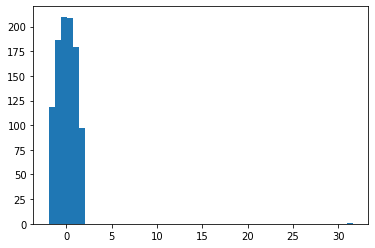

delta = 0.01


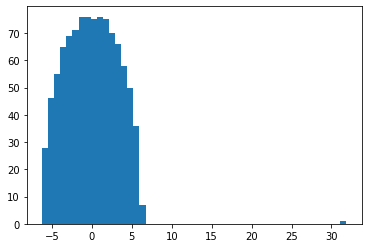

delta = 0.1


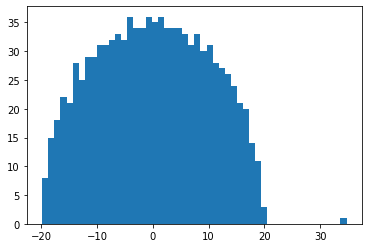

delta = 1.0


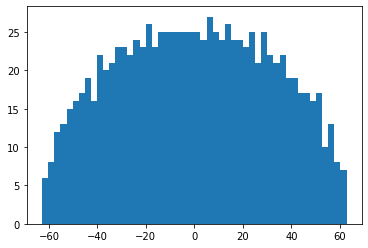

delta = 10.0


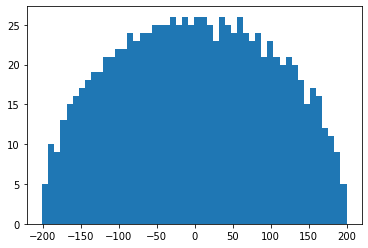

In [ ]:
# Plot the spectrum for N = 1000, delta = {.001, .01, .1, 10, 100}

N = 1000

Deltas = np.logspace(-3, 1, 5)

for Delta in Deltas:

    print(f'delta = {Delta}')
    _, Y = card_game_dataset(N, Delta)
    eval, evec = np.linalg.eigh(Y)
    plt.hist(eval, bins=50)
    plt.show();
    

There is an outlying eigenvalue (spike), which gets swallowed by the bulk as $\Delta$ exceeds a certain value.

3. We are going to infer the cards' values $s_i$ using the spectral estimator $\hat{s}_i = \text{sign}(e_i^{\max})$, with $e_i^{\max}$ the $i$-th component of eigenvector corresponding to the largest eigenvalue. Compute the alignment $$Q = {\rm abs}\left(\frac{1}{N} \sum_{i=1}^N s_i \hat{s}_i \right).$$
Notice the absolute value in order to take into account the symmetry $s \to -s$ in the problem. Compute $Q$ for different values of $\Delta$ between 0 and 3. Average over 5 realizations for each considered value of $\Delta$, and plot $Q$ vs $\Delta$. Comment. What kind of phase transition do you observe? How is the spectrum of Y related to the recovery of the two groups?

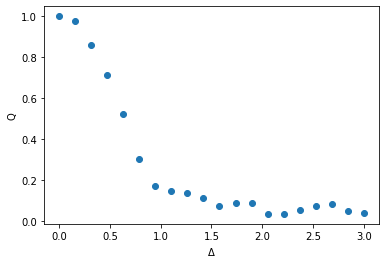

In [ ]:
# Compute the alignment Q of the spectral estimator with the vector S

Deltas = np.linspace(0, 3, 20)

Q = []
exps = 5

for Delta in Deltas:

    q = np.zeros(exps)

    for exp in range(exps):
        S, Y = card_game_dataset(N, Delta)
        max_eval, max_evec = sla.eigh(Y, eigvals=(len(Y)-1, len(Y)-1))
        q[exp] = np.absolute((np.sign(max_evec) * S).mean())

    Q.append(q.mean())

plt.plot(Deltas, Q, 'o')
plt.xlabel('$\Delta$')
plt.ylabel('Q');


One can observe a transition from a phase where the signal is undetectable ($Q=0$) for large noises $\Delta$ to a phase where $Q>0$ for smaller noises. The value of $\Delta$ at which the signal can be retrieved corresponds to the value for which the spike emerges from the bulk spectrum.